In [51]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
from scipy.stats import shapiro, yeojohnson, kruskal
import scikit_posthocs as sp
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [52]:
# loading data from csvs
password = pd.read_csv('data/csvs/password.csv')
quest = pd.read_csv('data/csvs/quest.csv')
csquestquant = pd.read_csv('data/csvs/csquestquant.csv')
demo = pd.read_csv('data/csvs/demo.csv')

display(password.head())
display(quest.head())
display(csquestquant.head())
display(demo.head())

,Password Strength,Motivation After Design,Hard to Remember,Guessed by Hacker,Guessed by FnF,Stronger than Usual,Password Generation,Actual Strength,design
0,2,1,-3,-2,-3,-1,-1.25,-3.0,Metaphor
1,3,-3,3,-3,-3,0,1.75,3.0,Personal
2,2,2,-2,-1,-3,2,-2.00,-1.5,Consequences
3,2,3,2,-3,-3,2,1.50,3.0,Consequences
4,3,3,2,-3,-3,3,1.75,0.0,Logos


,Perspicuity,Aesthetics,Usefulness,Clarity,design
0,-1.50,-2.75,0.25,-3.00,Metaphor
1,2.25,-2.75,0.25,2.00,Personal
2,3.00,0.50,2.00,2.75,Consequences
3,1.50,2.25,2.50,2.50,Consequences
4,3.00,2.50,3.00,3.00,Logos


,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,Novel,Attractive,Informative,Easy to understand,To the Point,Creative,Well Organized,Engaging,Real life motivation,design
0,1.0,2.0,-1.0,-1.0,-3.0,-3.0,-2.0,1.0,-2.0,0.0,-3.0,-3.0,2.0,-3.0,0.0,-2.0,Metaphor
1,-3.0,1.0,-3.0,0.0,-3.0,-3.0,3.0,-3.0,-3.0,1.0,2.0,1.0,0.0,2.0,-3.0,-3.0,Personal
2,1.0,1.0,2.0,2.0,-1.0,-2.0,3.0,-3.0,1.0,2.0,3.0,3.0,-2.0,3.0,0.0,2.0,Consequences
3,2.0,0.0,1.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,Consequences
4,0.0,0.0,-3.0,2.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,Logos


,gender,age,race,highest education,education field,occupation,tech experience,cyber experience,design
0,Man,25-29 years old,White,Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,Pursuing or completed a degree,Metaphor
1,Man,35-39 years old,Hispanic or Latino,High School Graduate,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,No experience,Personal
2,Man,18-24 years old,White,Four-year College Degree,"Mathematics, and Natural Sciences (Physics, Ch...",Unemployed,No experience,No experience,Consequences
3,Woman,30-34 years old,White,Four-year College Degree,Other areas of Engineering,Non-profit organization,Pursuing or completed a degree,Formal training,Consequences
4,Man,35-39 years old,Native American or American Indian,Four-year College Degree,Business,Business or industry,Pursuing or completed a degree,Formal training,Logos


In [53]:
csquest_pass = csquestquant.join(password['Motivation After Design']).join(password['Actual Strength']).join(password['Stronger than Usual']).join(quest['Perspicuity']).join(quest['Clarity'])
csquest_pass.head()

,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,Novel,Attractive,Informative,...,Creative,Well Organized,Engaging,Real life motivation,design,Motivation After Design,Actual Strength,Stronger than Usual,Perspicuity,Clarity
0,1.0,2.0,-1.0,-1.0,-3.0,-3.0,-2.0,1.0,-2.0,0.0,...,2.0,-3.0,0.0,-2.0,Metaphor,1,-3.0,-1,-1.50,-3.00
1,-3.0,1.0,-3.0,0.0,-3.0,-3.0,3.0,-3.0,-3.0,1.0,...,0.0,2.0,-3.0,-3.0,Personal,-3,3.0,0,2.25,2.00
2,1.0,1.0,2.0,2.0,-1.0,-2.0,3.0,-3.0,1.0,2.0,...,-2.0,3.0,0.0,2.0,Consequences,2,-1.5,2,3.00,2.75
3,2.0,0.0,1.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,...,2.0,1.0,1.0,2.0,Consequences,3,3.0,2,1.50,2.50
4,0.0,0.0,-3.0,2.0,1.0,3.0,2.0,3.0,3.0,2.0,...,2.0,3.0,3.0,3.0,Logos,3,0.0,3,3.00,3.00


In [54]:
test = {}
designs = []
quests = csquest_pass.columns.to_list()
quests.remove('design')
for i, param in enumerate(quests):
    test[param] = []
    for design in did_map.values():
        test[param].append(csquest_pass[csquest_pass['design']==design][param].to_list())
        designs.append(design) if i<=0 else None

In [55]:
# Performing kruskal test
for k, v in test.items():
    print(f'{k}: {kruskal(*v)}')

Portrayal of hacker stimulates: KruskalResult(statistic=30.657402454816708, pvalue=3.59568207315946e-06)
Portrayal of victim encourages: KruskalResult(statistic=39.0281542108956, pvalue=6.873785525125395e-08)
Makes me worried: KruskalResult(statistic=1.4469372883067793, pvalue=0.8359974380241102)
Encouragement for strong password: KruskalResult(statistic=7.130754876219133, pvalue=0.12913766841897564)
Emotional Connection: KruskalResult(statistic=4.179983696642743, pvalue=0.3821953569391785)
Personal Connection: KruskalResult(statistic=5.202324296206577, pvalue=0.2671605378754371)
Easy to follow: KruskalResult(statistic=4.157075901748621, pvalue=0.38516511832706357)
Novel: KruskalResult(statistic=3.01330942132804, pvalue=0.5556005761787701)
Attractive: KruskalResult(statistic=6.981197768344128, pvalue=0.136885179618206)
Informative: KruskalResult(statistic=9.453195330411226, pvalue=0.05071791455382892)
Easy to understand: KruskalResult(statistic=9.932563147904807, pvalue=0.0415790978908

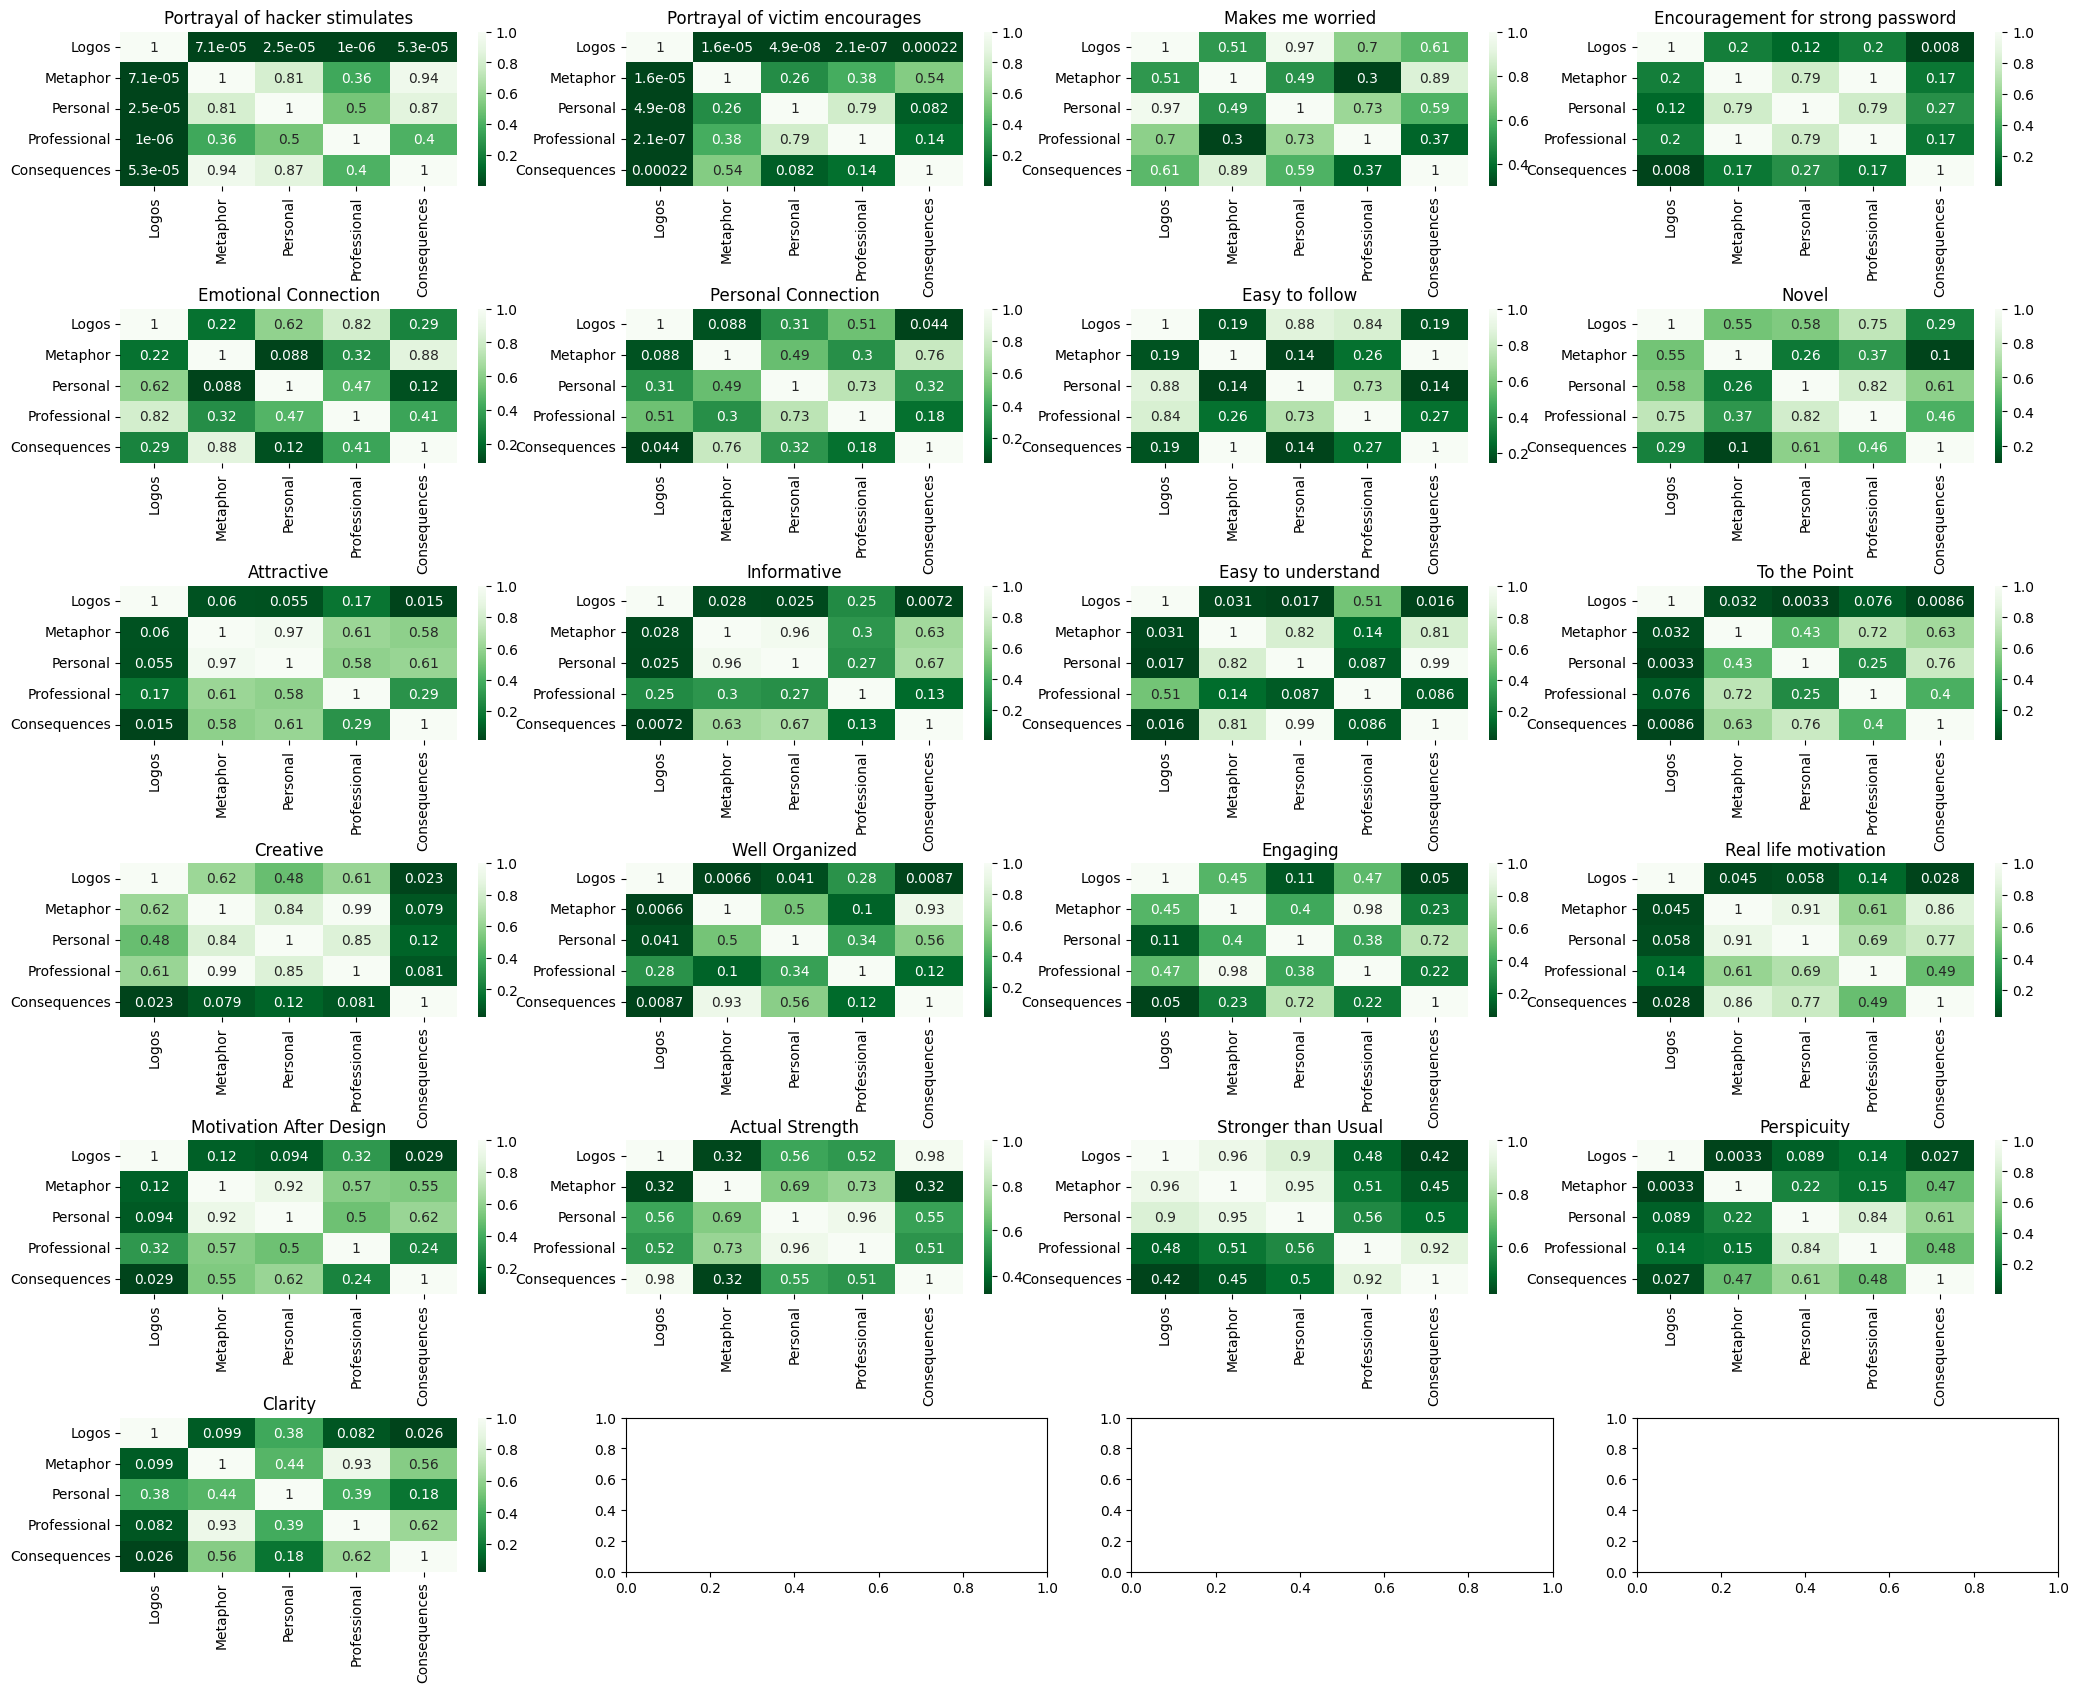

In [56]:
nrows, ncols = 6, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 20))
fig.subplots_adjust(hspace=0.8)

k=0
for i in range(nrows):
    for j in range(ncols):
        if k < len(quests):
            data = sp.posthoc_dunn(test[quests[k]])
            data.index = data.index.map(get_design)
            data.columns = data.columns.map(get_design)
            sns.heatmap(data, annot=True, ax=axes[i][j], cmap="Greens_r")
            axes[i][j].set_title(quests[k])
            k += 1

/var/folders/y0/_c2r85zn1137ydw7ltj1v0pr0000gq/T/ipykernel_214/416212237.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = csquest_pass.corr(method='pearson')


<AxesSubplot: >

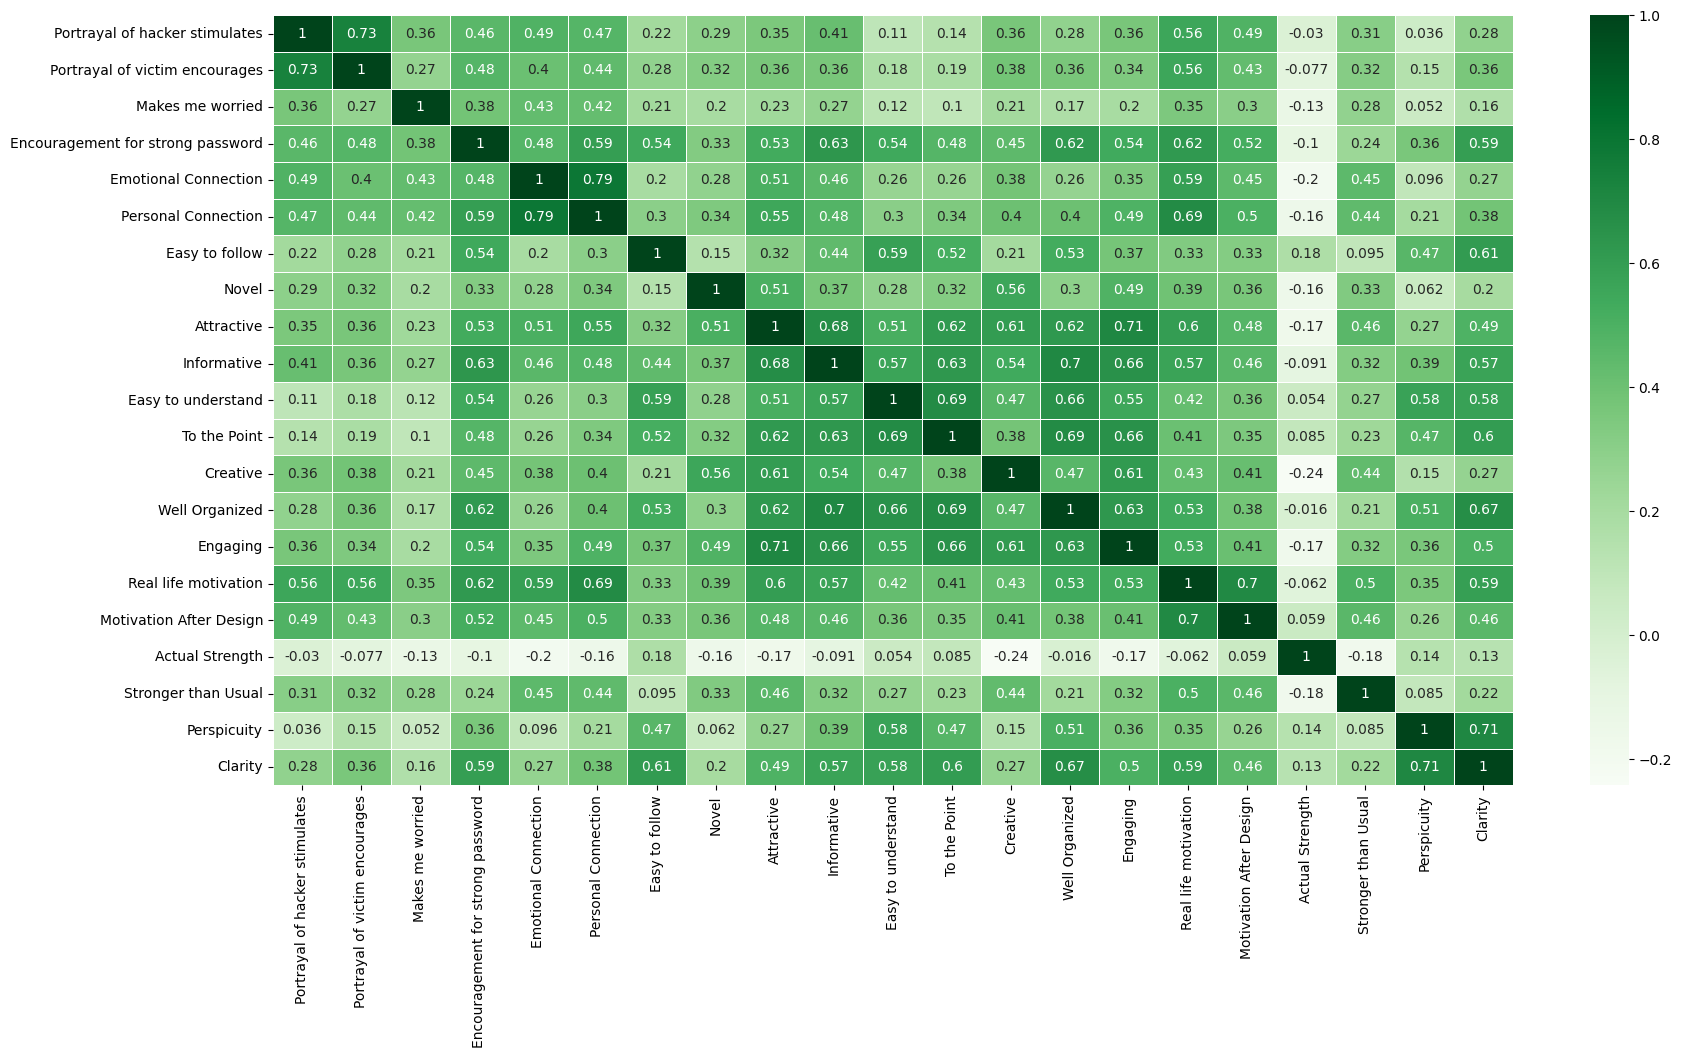

In [57]:
cormat = csquest_pass.corr(method='pearson')

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(cormat, annot=True, cmap="Greens", linewidths=.5, ax=ax)

## Relationship between experience and password strength

In [69]:
temp_demo_field = ['tech experience', 'cyber experience', 'occupation']
temp_pass_field = ['Password Strength', 'Actual Strength']
exp_passstrength = password[temp_pass_field].join(demo[temp_demo_field])
exp_passstrength.head()

,Password Strength,Actual Strength,tech experience,cyber experience,occupation
0,2,-3.0,Pursuing or completed a degree,Pursuing or completed a degree,Business or industry
1,3,3.0,Self-taught,No experience,Business or industry
2,2,-1.5,No experience,No experience,Unemployed
3,2,3.0,Pursuing or completed a degree,Formal training,Non-profit organization
4,3,0.0,Pursuing or completed a degree,Formal training,Business or industry


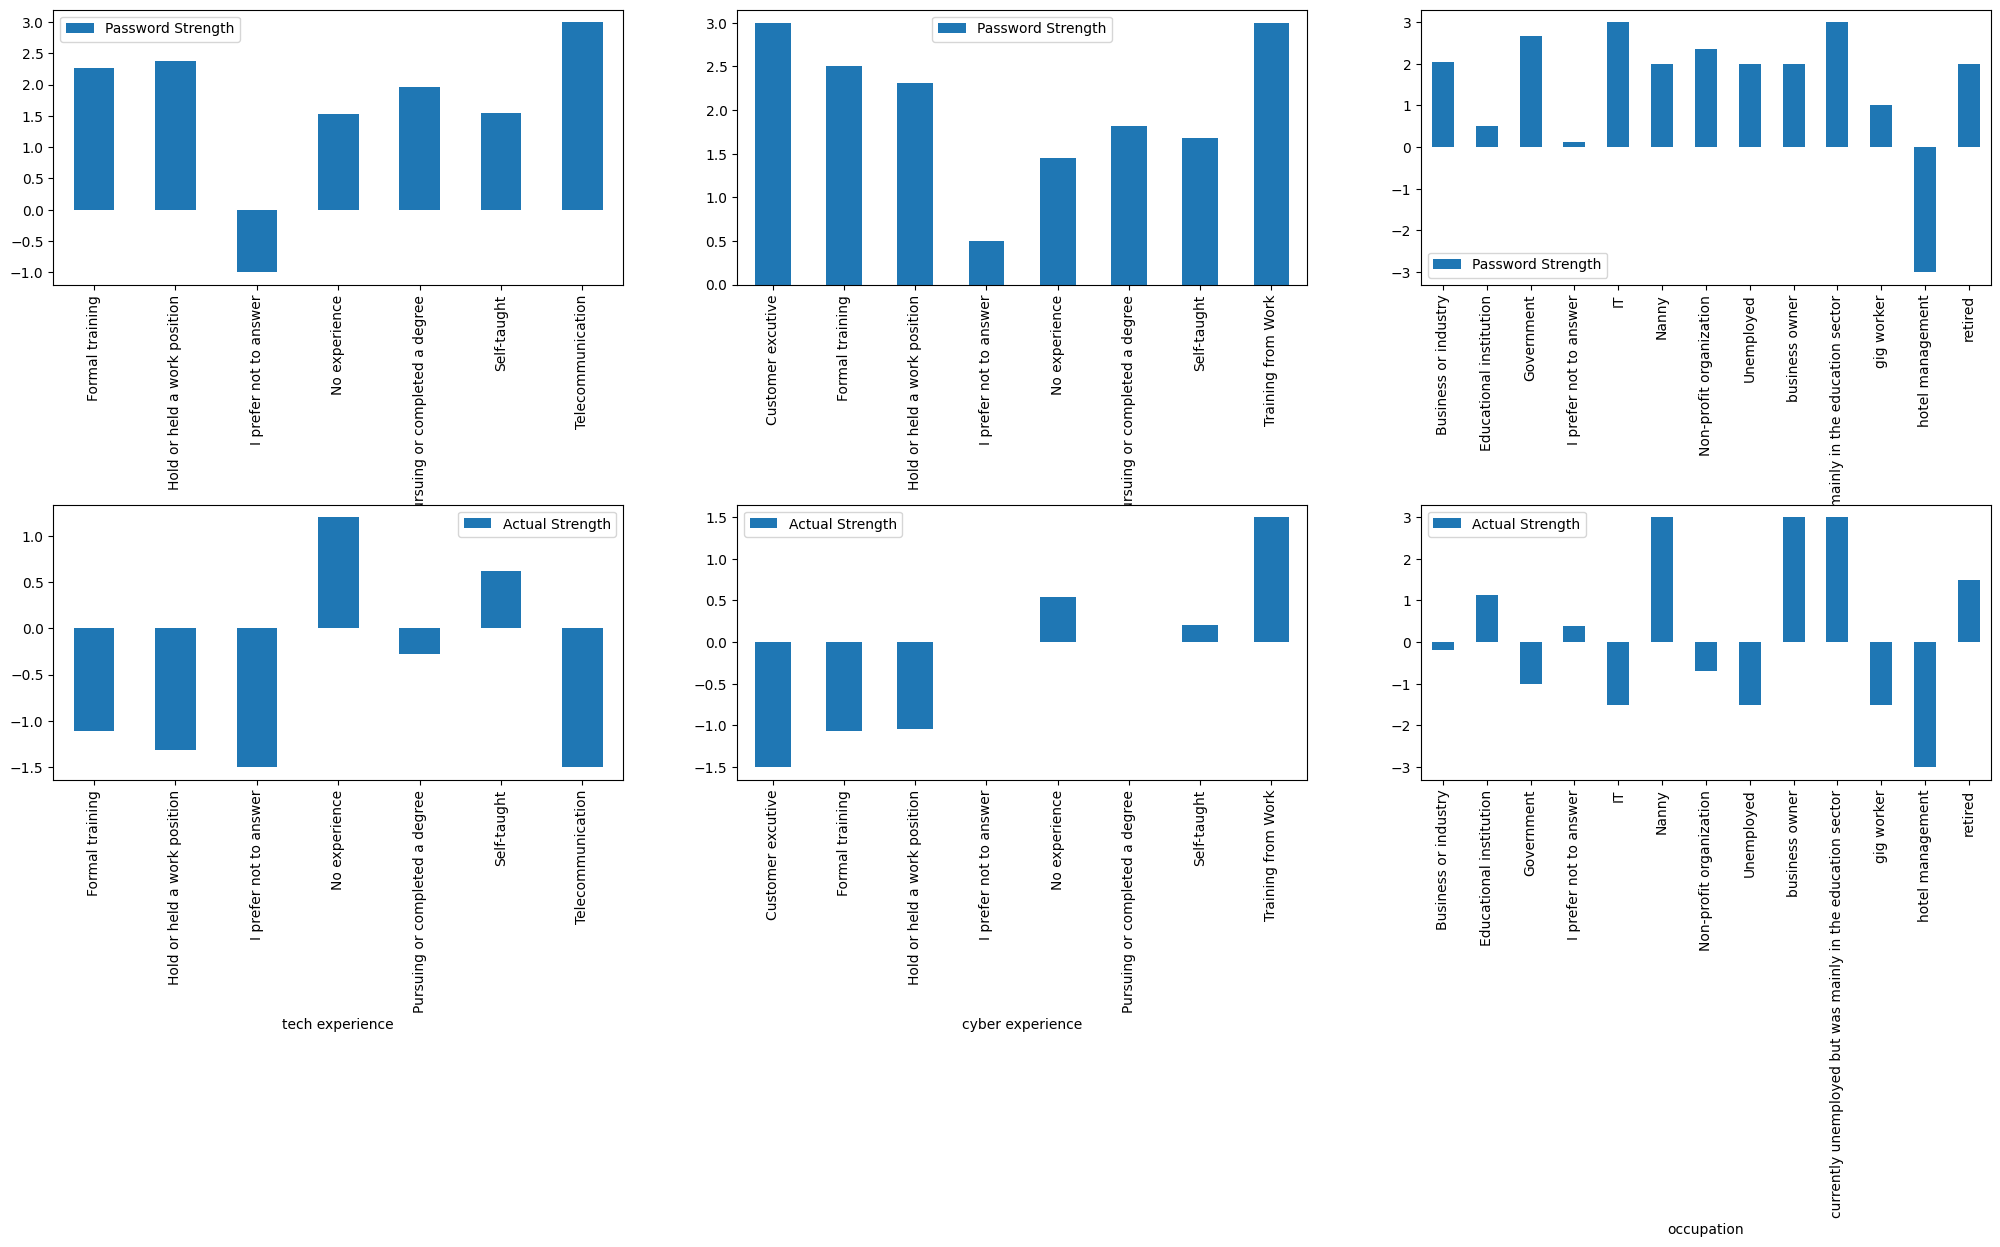

In [72]:
fig, axes = plt.subplots(len(temp_pass_field), len(temp_demo_field), figsize=(25, 10))
fig.subplots_adjust(hspace=0.8)

for i, tpass in enumerate(temp_pass_field):
    for j, tdemo in enumerate(temp_demo_field):
        exp_passstrength.groupby(tdemo)[tpass].mean().to_frame().plot.bar(ax=axes[i][j])